In [99]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Set the maximum column width to ensure complete values are shown
pd.set_option('display.max_rows', None)

# To see the entire columns present in dataframe
pd.set_option('display.max_columns', None)

# Set the maximum column width to ensure complete values are shown
pd.set_option('display.max_colwidth', None)

In [17]:
'''
Chunking 
chunksize = 1000
chunks = pd.read_csv('resalys_acsi_booking_march.csv', chunksize=chunksize) # this will return TextFileReader obj which we have to iterate
# iterate over chunks
for chunk in chunks:
    # now we can perform pandas normal functions on top of chunk
    processed_chunk = chunk.groupby('column_name').sum()

1 - Handling the combination of results efficiently depends on what you want to achieve with the processed chunks. Here are a few approaches:
Append to a List: If you simply want to store each processed chunk for later use, you can append them to a list and then concatenate them outside the loop. 
However, be cautious with this approach for very large datasets, as keeping all chunks in memory simultaneously may lead to memory issues.
processed_chunks = []

# Iterate over the chunks
for chunk in chunks:
    # Process the chunk
    processed_chunk = chunk.groupby('column_name').sum()
    
    # Append processed chunk to the list
    processed_chunks.append(processed_chunk)

# Combine the results by concatenating the list of processed chunks
combined_result = pd.concat(processed_chunks)

2 - Aggregate Results: If your goal is to aggregate results across chunks, you can perform aggregation operations within the loop.
aggregated_result = None

# Iterate over the chunks
for chunk in chunks:
    # Process the chunk
    processed_chunk = chunk.groupby('column_name').sum()

    # Aggregate the results
    if aggregated_result is None:
        aggregated_result = processed_chunk
    else:
        aggregated_result += processed_chunk

# Final aggregated result

3 - Streaming or Writing to File: Instead of storing all results in memory, you can stream the results to a file or database, 
or perform other actions such as logging or real-time analysis.

output_file = 'output.csv'

# Iterate over the chunks
for chunk in chunks:
    # Process the chunk
    processed_chunk = chunk.groupby('column_name').sum()

    # Write the processed chunk to file
    processed_chunk.to_csv(output_file, mode='a', header=not os.path.exists(output_file))

'''

"\nChunking \nchunksize = 1000\nchunks = pd.read_csv('resalys_acsi_booking_march.csv', chunksize=chunksize) # this will return TextFileReader obj which we have to iterate\n# iterate over chunks\nfor chunk in chunks:\n    # now we can perform pandas normal functions on top of chunk\n    processed_chunk = chunk.groupby('column_name').sum()\n\n1 - Handling the combination of results efficiently depends on what you want to achieve with the processed chunks. Here are a few approaches:\nAppend to a List: If you simply want to store each processed chunk for later use, you can append them to a list and then concatenate them outside the loop. \nHowever, be cautious with this approach for very large datasets, as keeping all chunks in memory simultaneously may lead to memory issues.\nprocessed_chunks = []\n\n# Iterate over the chunks\nfor chunk in chunks:\n    # Process the chunk\n    processed_chunk = chunk.groupby('column_name').sum()\n    \n    # Append processed chunk to the list\n    process

In [9]:
'''
# this is not the best way to work on dataset which has lakhs of records(rows)
# instead we should use - chunking 
# loading the dataset for hiketron -> for all categories
all_products_df = pd.read_csv('resalys_acsi_booking_march.csv', nrows=records_to_fetch)
all_products_df
'''
# since data is huge, setting record limit
records_to_fetch = 18000
df = pd.read_csv('resalys_query_booking_header_27_march.csv', nrows=records_to_fetch)

# Initial Data Inspection
print("First few rows of the dataset:")
df.columns

First few rows of the dataset:


Index(['Unnamed: 0', 'Id', 'BookingId', 'BookingType', 'ResalysCampsiteId',
       'AcsiCampsiteId', 'CampsiteCode', 'SuncampCampsiteId',
       'BookingDownPayment', 'BookingDownPaymentPaid', 'IsDownPaymentPaid',
       'BookingDownPaymentFinalDate', 'BookingDownPaymentPaidDate',
       'BookingRemainingAmount', 'BookingRemainingAmountPaid',
       'IsRemainingAmountPaid', 'BookingRemainingPaidDate',
       'BookingRemainingPaymentFinalDate', 'BookingTotalAmount',
       'GuestExternalId', 'GuestId', 'GuestGender', 'GuestFirstName',
       'GuestLastName', 'GuestBirthDate', 'GuestLanguage', 'GuestEmail',
       'GuestStreetName', 'GuestZipCode', 'GuestCity', 'GuestCountryCode',
       'GuestCountryLabel', 'GuestPhoneNumber', 'GuestNumber', 'ArrivalDate',
       'DepartureDate', 'NightDuration', 'AccommodationCode',
       'AccommodationLabel', 'BookingRemark1', 'BookingRemark2',
       'BookingRemark3', 'BookingRemark4', 'BookingRemark5', 'BookingRemark6',
       'CreatedOn', 'Modifie

In [13]:
# head of the dataset
# load first 5 records from the dataset, this will help to understand the type of data a feature have
print(df.head())

# getting the info of the dataset
# Dtype examples like - int64, float64, object, bool etc
print(df.info()) # gives Non-Null count and Dtype of each feature

# getting stats of the data like mean, median, Standard deviation etc
print(df.describe())

   Unnamed: 0      Id  BookingId BookingType  ResalysCampsiteId  \
0           0  159365     173206         pex                896   
1           1  159366     173205         gin                824   
2           2  159367     173208         gin               2157   
3           3  159368     173207         gin               2567   
4           4  159369     173209         gin               1378   

   AcsiCampsiteId CampsiteCode  SuncampCampsiteId  BookingDownPayment  \
0          102002   DUI-B10-30                  0                0.00   
1          104871   ITA-G05-34             180240                0.00   
2          105177   KRO-E02-43             180221              492.74   
3          100684   SLV-D06-10                  0                0.00   
4          101061   FRA-N15-20                  0              168.00   

   BookingDownPaymentPaid  IsDownPaymentPaid BookingDownPaymentFinalDate  \
0                    0.00              False                         NaN   
1     

In [18]:
# Handle Missing Values
print("\nHandling missing values:")
print("Number of missing values per column:")
print(df.isnull().sum())

# TODO -> add more techniques to handle missing values in data apart from dropna
# things to learn - you might fill them with a specific value, forward fill, backward fill, 
#or drop the rows/columns with missing values.


Handling missing values:
Number of missing values per column:
Unnamed: 0                              0
Id                                      0
BookingId                               0
BookingType                             0
ResalysCampsiteId                       0
AcsiCampsiteId                          0
CampsiteCode                          439
SuncampCampsiteId                       0
BookingDownPayment                      0
BookingDownPaymentPaid                  0
IsDownPaymentPaid                       0
BookingDownPaymentFinalDate          8935
BookingDownPaymentPaidDate          10701
BookingRemainingAmount                  0
BookingRemainingAmountPaid              0
IsRemainingAmountPaid                   0
BookingRemainingPaidDate            11436
BookingRemainingPaymentFinalDate      529
BookingTotalAmount                      0
GuestExternalId                     17132
GuestId                              5366
GuestGender                          5083
GuestFirstNam

In [96]:
'''
Learning purpose code ->

# operations on data
# Slicing of DataFrame
sliced_dataframe = df[0:4]
sliced_dataframe

# performing loc - Label indexing
# Basically loc is used for accessing multiple columns based on some filter criteriad

sliced_dataframe.loc[sliced_dataframe['BookingType'] == "gin"] # for filtering based on single column value

# Filtering based on multiple columns
sliced_dataframe.loc[(sliced_dataframe['BookingType'] == "gin") & (sliced_dataframe['IsDownPaymentPaid'] == True)] # for filtering based on multiple column values

# value = df.loc['row_label', 'column_label']
sliced_dataframe.loc[0, 'BookingType'] # this gives 0 indexed value of BookingType column

# fetching filtered colum indexed values
sliced_dataframe.loc[0:4,['BookingType', 'IsDownPaymentPaid']] # shows 0,1,2,3 indexed rows/records only for 2 columns
'''

'\nLearning purpose code ->\n\n# operations on data\n# Slicing of DataFrame\nsliced_dataframe = df[0:4]\nsliced_dataframe\n\n# performing loc - Label indexing\n# Basically loc is used for accessing multiple columns based on some filter criteriad\n\nsliced_dataframe.loc[sliced_dataframe[\'BookingType\'] == "gin"] # for filtering based on single column value\n\n# Filtering based on multiple columns\nsliced_dataframe.loc[(sliced_dataframe[\'BookingType\'] == "gin") & (sliced_dataframe[\'IsDownPaymentPaid\'] == True)] # for filtering based on multiple column values\n\n# value = df.loc[\'row_label\', \'column_label\']\nsliced_dataframe.loc[0, \'BookingType\'] # this gives 0 indexed value of BookingType column\n\n# fetching filtered colum indexed values\nsliced_dataframe.loc[0:4,[\'BookingType\', \'IsDownPaymentPaid\']] # shows 0,1,2,3 indexed rows/records only for 2 columns\n'

In [83]:
'''
Learning purpose code ->

# performing iloc - .iloc function is mainly used for integer indexing

# iloc[row, column]
sliced_dataframe.iloc[0,4] # here 0 is row and 4 is column (i.e column which is in 4th index)

# iloc[row_slice, column_slicing]
sliced_dataframe.iloc[0:4, 1:9] # gives 5 records/rows of columns indexed from 1:5
'''

,Unnamed: 0,Id,BookingType,ResalysCampsiteId,AcsiCampsiteId,CampsiteCode,SuncampCampsiteId,BookingDownPayment,BookingDownPaymentPaid,IsDownPaymentPaid,BookingDownPaymentFinalDate,BookingDownPaymentPaidDate,BookingRemainingAmount,BookingRemainingAmountPaid,IsRemainingAmountPaid,BookingRemainingPaidDate,BookingRemainingPaymentFinalDate,BookingTotalAmount,GuestExternalId,GuestId,GuestGender,GuestFirstName,GuestLastName,GuestBirthDate,GuestLanguage,GuestEmail,GuestStreetName,GuestZipCode,GuestCity,GuestCountryCode,GuestCountryLabel,GuestPhoneNumber,GuestNumber,ArrivalDate,DepartureDate,NightDuration,AccommodationCode,AccommodationLabel,BookingRemark1,BookingRemark2,BookingRemark3,BookingRemark4,BookingRemark5,BookingRemark6,CreatedOn,ModifiedOn,CancelledOn,IsSynced,SyncedDateTime,CancellationReason,IsFinal,BookingProductLines,ModifiedBookingOn,PartnerName,PartnerCode,PartnerIndex,ActualBookingTotalAmount,ActualBookingDownPayment,ActualBookingDownPaymentPaid,ActualBookingRemainingAmount,ActualBookingRemainingAmountPaid,IsSyncedFromV2,SyncedDateTimeFromV2
0,0,159365,pex,896,102002,DUI-B10-30,0,0.0,0.0,False,NaN,NaN,202.5,0.0,False,NaN,2024-03-27,202.5,NaN,IND148887,MRS,Tamara,Tomassen,1985-08-22,NL,tamara_tomassen@hotmail.com,Hogesteeg 48,3826 Hd,Amersfoort,NL,Netherlands,0621639295,3,2024-05-09,2024-05-13,4,P2,Pitch C3,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-27,2024-03-27,NaN,False,NaN,NaN,False,9,2024-03-27 10:00:53.687,NaN,NaN,0,202.5,0.0,0.0,202.5,0.0,False,NaN
1,1,159366,gin,824,104871,ITA-G05-34,180240,0.0,0.0,False,NaN,NaN,1245.0,0.0,False,NaN,2024-05-19,1245.0,NaN,IND148886,MR,Christian,Holthaus gmbh 109596,1987-10-08,IT,email_vty1op@suncamp.nl,Geurdeland 9,6673 DR,Andelst,NL,Netherlands,0488-454245,4,2024-05-19,2024-05-29,10,SAFA,SunLodge Lodge Tent Safari,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-27,2024-03-27,NaN,False,NaN,NaN,False,8,NaN,Folli Baia Holiday,BAIA2,0,1245.0,0.0,0.0,1245.0,0.0,False,NaN


In [15]:
'''
Learning purpose code ->

# performing Column based EDA
cols = df.columns

# it will drop 1st index row's record i.e eliminates rows whose index is 1
sliced_dataframe.drop(1, axis=0)

# drop un-necessary columns 
sliced_dataframe.drop(['BookingId', 'ResalysCampsiteId', 'AcsiCampsiteId'], axis=1)
# OR
sliced_dataframe.drop(columns=['BookingId'], inplace=True)
# sliced_dataframe
# # fetching unique values based on column
sliced_dataframe['BookingType'].unique()

# # fetching non-unique values based on column
sliced_dataframe['BookingType'].nunique()

# # Based on column values, it gives count of every value in that column.
sliced_dataframe['BookingType'].value_counts()
sliced_dataframe['GuestGender'].value_counts() # gives how many male and female are there with count

# rename a column or mutiple columns
sliced_dataframe.rename(columns={'BookingType': 'BookingTypeName'}, inplace=True)
'''

"\nLearning purpose code ->\n\n# performing Column based EDA\ncols = df.columns\n\n# it will drop 1st index row's record i.e eliminates rows whose index is 1\nsliced_dataframe.drop(1, axis=0)\n\n# drop un-necessary columns \nsliced_dataframe.drop(['BookingId', 'ResalysCampsiteId', 'AcsiCampsiteId'], axis=1)\n# OR\nsliced_dataframe.drop(columns=['BookingId'], inplace=True)\n# sliced_dataframe\n# # fetching unique values based on column\nsliced_dataframe['BookingType'].unique()\n\n# # fetching non-unique values based on column\nsliced_dataframe['BookingType'].nunique()\n\n# # Based on column values, it gives count of every value in that column.\nsliced_dataframe['BookingType'].value_counts()\nsliced_dataframe['GuestGender'].value_counts() # gives how many male and female are there with count\n\n# rename a column or mutiple columns\nsliced_dataframe.rename(columns={'BookingType': 'BookingTypeName'}, inplace=True)\n"

In [28]:
# Data OverView

# Identify categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Features:")
print(categorical_features)

# Analyzing Categorical Features
# here we can look at the unique values, their counts, and the distribution.
for feature in categorical_features:
    print(f"Feature: {feature}")
    print(df[feature].value_counts())
    print("\n")

# Identify numerical features
numerical_features = df.select_dtypes(include=['number']).columns
print("Numerical Features:")
print(numerical_features)

# Analyzing Numerical Features
for feature in numerical_features:
    print(f"Feature: {feature}")
    print(df[feature].describe())
    print("\n")

# Check for outliers using methods like the Interquartile Range (IQR).
# TODO -> read more about diff outliers methods 
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))).sum()
    print(f"Feature: {feature} - Outliers: {outliers}")
    print("\n")


In [54]:
# Analyzing Date-Related Features
# It helps us understand booking patterns over time
# ------------------
# # Check the current range of dates in your data
# print(df['ArrivalDate'].min(), df['ArrivalDate'].max())
# print(df['DepartureDate'].min(), df['DepartureDate'].max())

# Replace '9999-12-20' with '2023-12-20' in the ArrivalDate column
# df.loc[df['ArrivalDate'] == '9999-12-20', 'ArrivalDate'] = pd.to_datetime('2023-12-20')

# # Convert to datetime
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'])
df['DepartureDate'] = pd.to_datetime(df['DepartureDate'])

In [55]:
# Extracting date components

df['ArrivalYear'] = df['ArrivalDate'].dt.year
df['ArrivalMonth'] = df['ArrivalDate'].dt.month
df['ArrivalDayOfWeek'] = df['ArrivalDate'].dt.dayofweek

df['DepartureYear'] = df['DepartureDate'].dt.year
df['DepartureMonth'] = df['DepartureDate'].dt.month
df['DepartureDayOfWeek'] = df['DepartureDate'].dt.dayofweek

In [59]:
# Analysing booking patterns

# Yearly Pattern
print(df['ArrivalYear'].value_counts().sort_index())

# Monthly pattern
print(df['ArrivalMonth'].value_counts().sort_index())

# Day of the week pattern
print(df['ArrivalDayOfWeek'].value_counts().sort_index())

ArrivalYear
2023    9067
2024    8933
Name: count, dtype: int64
ArrivalMonth
1        2
2        8
3      115
4      954
5     1773
6     2465
7     5836
8     4835
9     1743
10     262
11       4
12       3
Name: count, dtype: int64
ArrivalDayOfWeek
0    2240
1    1027
2    2125
3    1084
4    2107
5    6136
6    3281
Name: count, dtype: int64


In [60]:
# Duration Analysis
print(df['NightDuration'].describe())

count    18000.000000
mean         8.727333
std          3.544529
min          1.000000
25%          7.000000
50%          7.000000
75%         11.000000
max         42.000000
Name: NightDuration, dtype: float64


In [61]:
# 2nd step -----> Visualisation

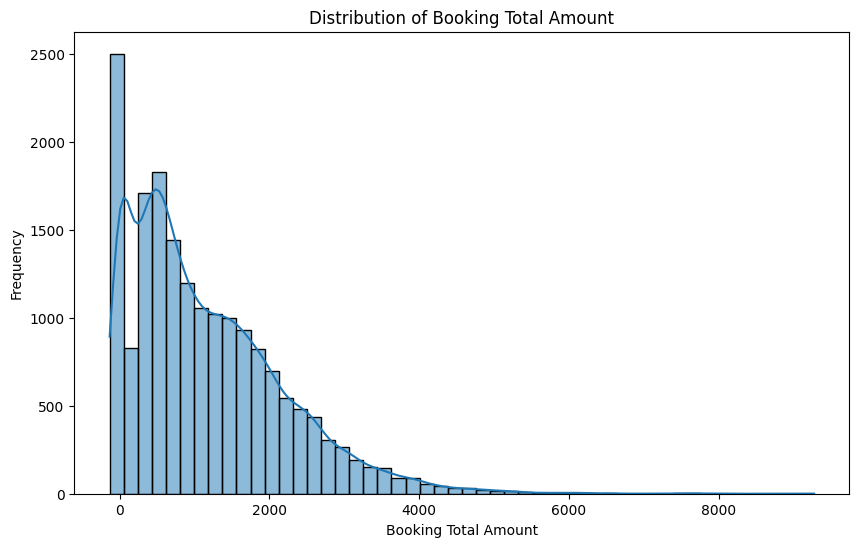

In [62]:
# Histograms

# Histogram for Booking Total Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['BookingTotalAmount'], bins=50, kde=True)
plt.title('Distribution of Booking Total Amount')
plt.xlabel('Booking Total Amount')
plt.ylabel('Frequency')
plt.show()

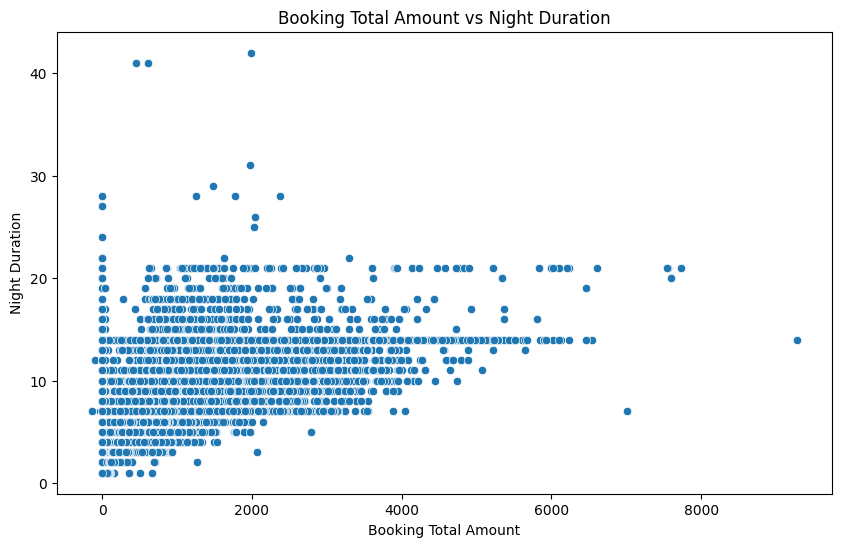

In [64]:
# Scatter Plots

# Scatter plot for Booking Total Amount vs Night Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['BookingTotalAmount'], y=df['NightDuration'])
plt.title('Booking Total Amount vs Night Duration')
plt.xlabel('Booking Total Amount')
plt.ylabel('Night Duration')
plt.show()

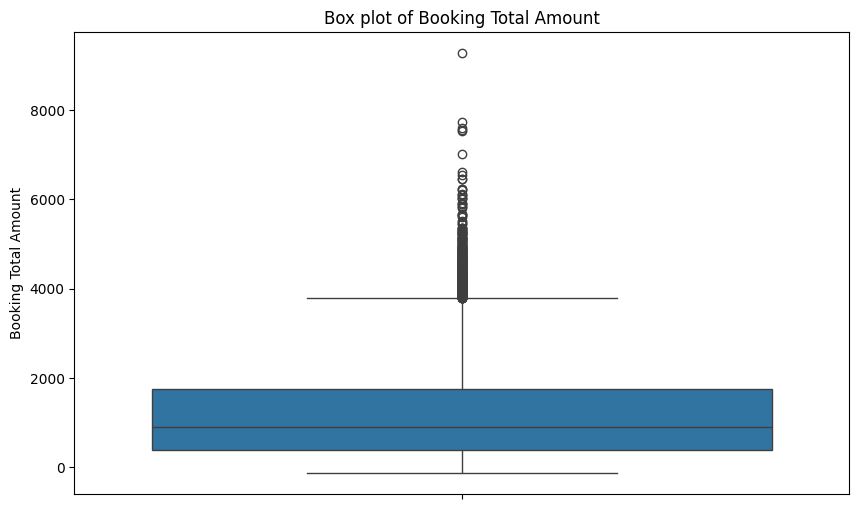

In [65]:
# Box Plots

# Box plot for Booking Total Amount
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['BookingTotalAmount'])
plt.title('Box plot of Booking Total Amount')
plt.ylabel('Booking Total Amount')
plt.show()

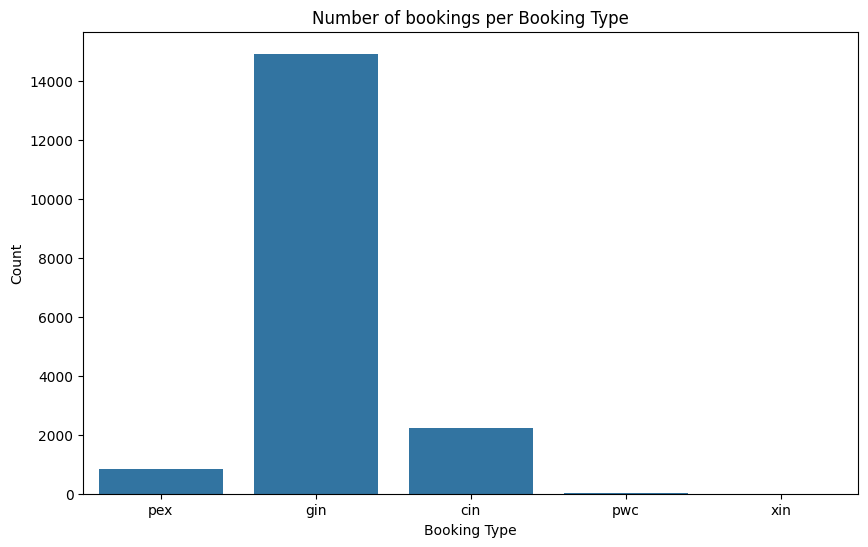

In [66]:
# Bar charts

# Bar chart for Booking Type
plt.figure(figsize=(10, 6))
sns.countplot(x=df['BookingType'])
plt.title('Number of bookings per Booking Type')
plt.xlabel('Booking Type')
plt.ylabel('Count')
plt.show()

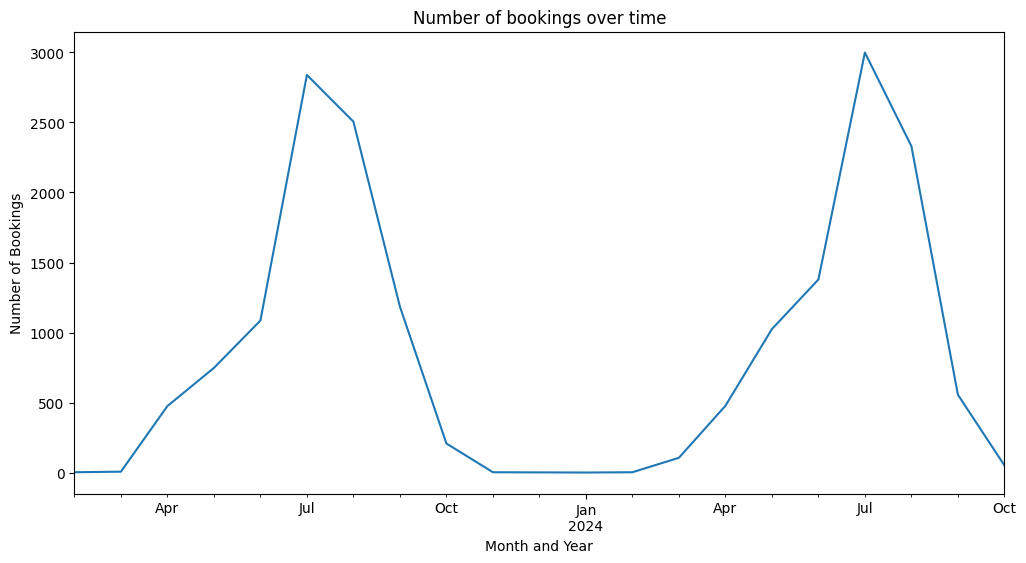

In [68]:
# Time series plots

# Convert to datetime if not already done
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'])

# Extract the month and year for aggregation
df['ArrivalMonthYear'] = df['ArrivalDate'].dt.to_period('M')

# Aggregate the data by month and year
monthly_bookings = df['ArrivalMonthYear'].value_counts().sort_index()

# Time series plot for number of bookings over time
plt.figure(figsize=(12, 6))
monthly_bookings.plot()
plt.title('Number of bookings over time')
plt.xlabel('Month and Year')
plt.ylabel('Number of Bookings')
plt.show()

In [72]:
# DATA PREPROCESSING STEP - 2ND step after EDA where we had covered
# 1 - Data overview
# 2 - Visualisation

'''
1. Data Preprocessing
Data preprocessing involves cleaning the data, handling missing values, and preparing it for modeling.

Steps:
Handle Missing Values: Impute or drop missing values.
Convert Categorical Variables: Use techniques like one-hot encoding.
Standardize/Normalize Features: Scale numerical features.

2. Feature Selection
Feature selection involves identifying the most relevant features for the model. We can use techniques such as:

Correlation Analysis
Feature Importance from Models (e.g., Random Forest)
Recursive Feature Elimination (RFE

3. Model Development
Develop machine learning models to predict the optimal prices. We will split the data, 
train the models, and evaluate their performance.

4. Scenario Simulation with Generative AI
To simulate different pricing scenarios, we can use a generative model such as a Variational Autoencoder (VAE) 
or Generative Adversarial Network (GAN). For simplicity, let's consider a VAE.
'''

"\n1. Data Preprocessing\nData preprocessing involves cleaning the data, handling missing values, and preparing it for modeling.\n\nSteps:\nHandle Missing Values: Impute or drop missing values.\nConvert Categorical Variables: Use techniques like one-hot encoding.\nStandardize/Normalize Features: Scale numerical features.\n\n2. Feature Selection\nFeature selection involves identifying the most relevant features for the model. We can use techniques such as:\n\nCorrelation Analysis\nFeature Importance from Models (e.g., Random Forest)\nRecursive Feature Elimination (RFE\n\n3. Model Development\nDevelop machine learning models to predict the optimal prices. We will split the data, \ntrain the models, and evaluate their performance.\n\n4. Scenario Simulation with Generative AI\nTo simulate different pricing scenarios, we can use a generative model such as a Variational Autoencoder (VAE) \nor Generative Adversarial Network (GAN). For simplicity, let's consider a VAE.\n"

In [95]:
# 1 - Data Preprocessing

# i). Handling Missing Values
# Fill numeric columns with the mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for column in categorical_cols:
    df[column].fillna(df[column].mode()[0], inplace=True)

# ii). Feature Engineering
# Ensure datetime columns are in datetime format
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'], errors='coerce')
df['CreatedOn'] = pd.to_datetime(df['CreatedOn'], errors='coerce')

# Extract date features from 'ArrivalDate'
df['ArrivalYear'] = df['ArrivalDate'].dt.year
df['ArrivalMonth'] = df['ArrivalDate'].dt.month
df['ArrivalDayOfWeek'] = df['ArrivalDate'].dt.dayofweek

# Calculate Booking Lead Time
df['BookingLeadTime'] = (df['ArrivalDate'] - df['CreatedOn']).dt.days

# Create payment ratio features
df['DownPaymentRatio'] = df['BookingDownPayment'] / df['BookingTotalAmount']
df['RemainingAmountRatio'] = df['BookingRemainingAmount'] / df['BookingTotalAmount']

# Calculate Night Duration Booking Total Amount
df['NightDuration_BookingTotalAmount'] = df['NightDuration'] * df['BookingTotalAmount']

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values created from infinite replacement
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# iii). Encoding Categorical Variables
# List of categorical columns to encode
categorical_features = ['BookingType', 'GuestGender', 'GuestLanguage', 'GuestCountryCode']

# Check for the presence of these columns in the dataframe
existing_categorical_features = [feature for feature in categorical_features if feature in df.columns]

# Convert categorical features to numeric using one-hot encoding
if existing_categorical_features:
    df = pd.get_dummies(df, columns=existing_categorical_features, drop_first=True)
else:
    print("No specified categorical features found in the dataframe for encoding.")

# iv). Normalization
# Standardize numeric features
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

No specified categorical features found in the dataframe for encoding.


/var/folders/tx/jhszhvjs6z7d3g5nv45gvy_c0000gn/T/ipykernel_21111/88453771.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
/Users/prakashsingh/DEV/chatbot/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:1108: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/prakashsingh/DEV/chatbot/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:1113: RuntimeWarning: invalid value encountered in d

In [102]:
# 2. Feature Selection
# i) Correlation Analysis
# ii) Feature Importance from Random Forest
# iii) Plot feature importances
# iv) Recursive Feature Elimination (RFE)

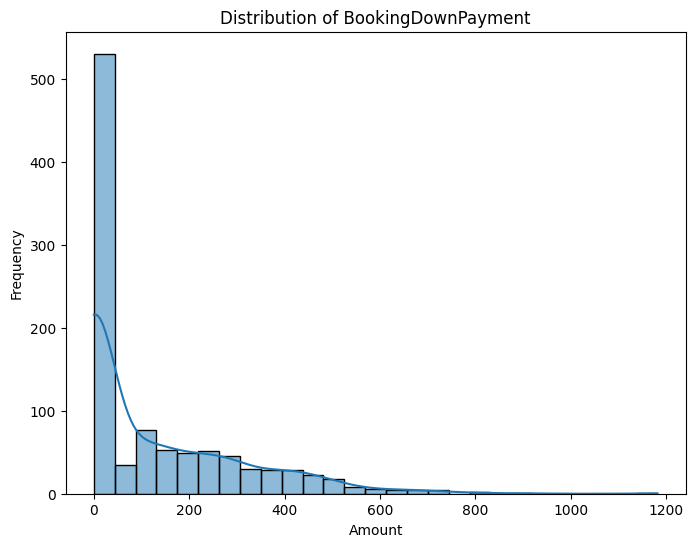

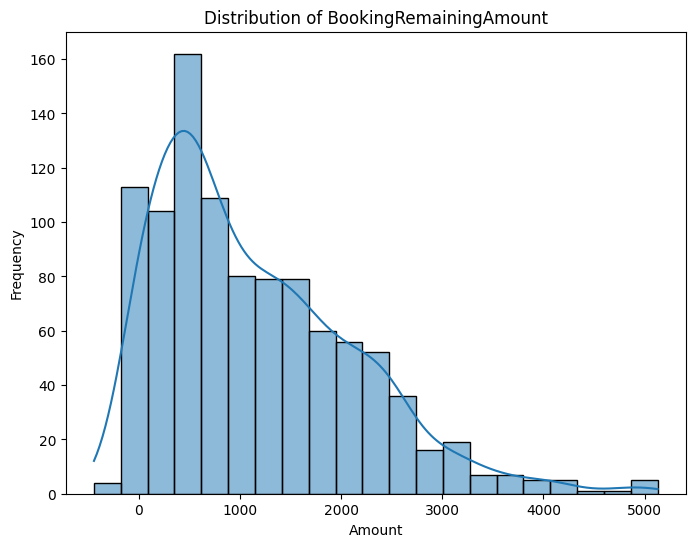

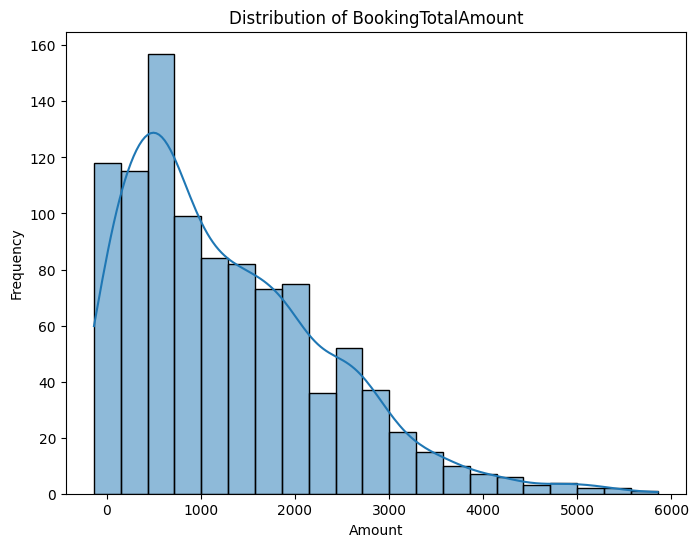

In [28]:
# Analysis of booking amounts
booking_amount_cols = ['BookingDownPayment', 'BookingRemainingAmount', 'BookingTotalAmount']
for col in booking_amount_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.show()


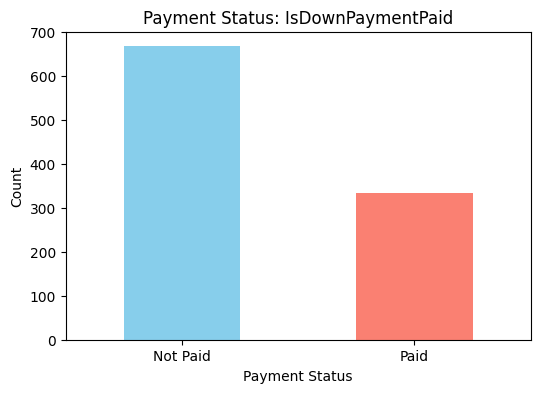

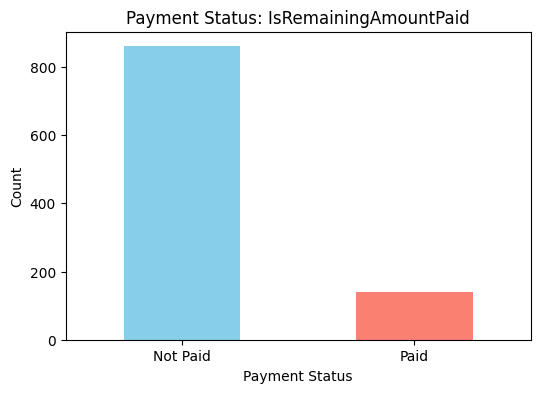

In [29]:
# Analysis of payment status
payment_status_cols = ['IsDownPaymentPaid', 'IsRemainingAmountPaid']
for col in payment_status_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(f'Payment Status: {col}')
    plt.xlabel('Payment Status')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Not Paid', 'Paid'], rotation=0)
    plt.show()

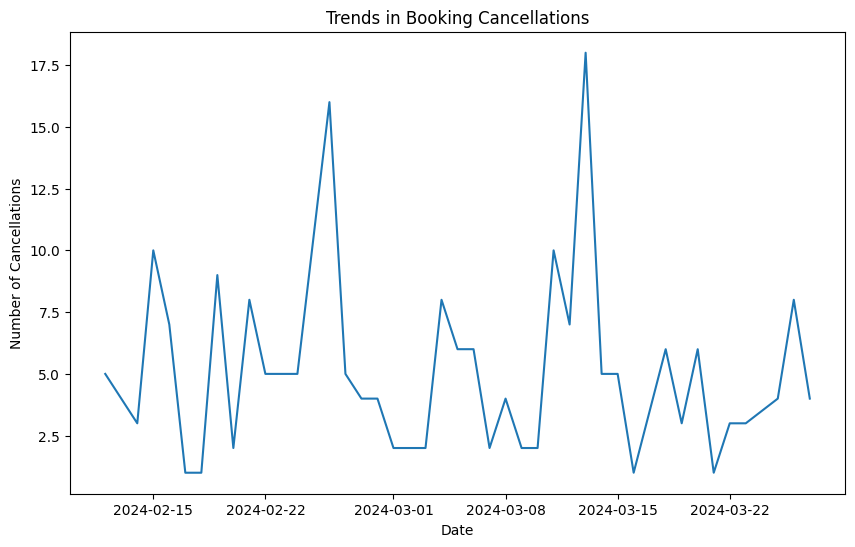

In [127]:
# Trends in booking cancellations
# Convert 'CancelledOn' to datetime if it is not already
df['CancelledOn'] = pd.to_datetime(df['CancelledOn'])

# Plot trends in booking cancellations
plt.figure(figsize=(10, 6))
df['CancelledOn'].dt.date.value_counts().sort_index().plot(kind='line')
plt.title('Trends in Booking Cancellations')
plt.xlabel('Date')
plt.ylabel('Number of Cancellations')
plt.show()

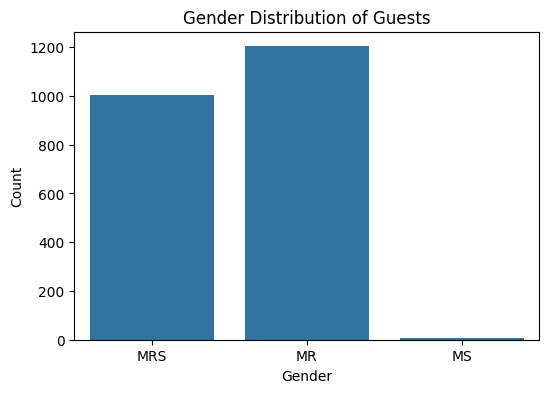

In [126]:
# Guest Analysis
# Demographic analysis of guests
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='GuestGender')
plt.title('Gender Distribution of Guests')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

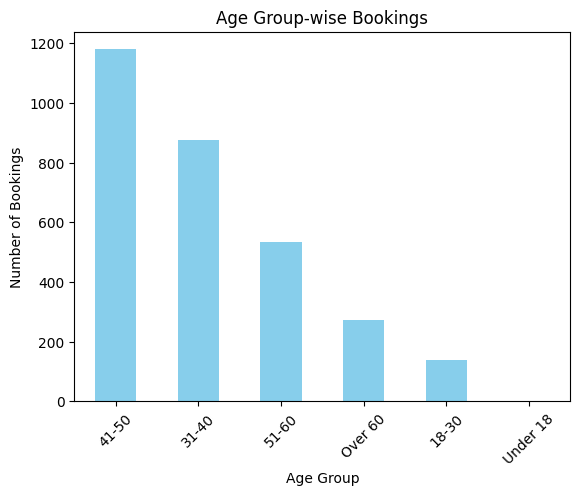

In [116]:
# Convert 'GuestBirthDate' to datetime if it is not already
df['GuestBirthDate'] = pd.to_datetime(df['GuestBirthDate'])

# Calculate age of guests based on 'GuestBirthDate' and current date
current_year = pd.to_datetime('today').year
df['GuestAge'] = current_year - df['GuestBirthDate'].dt.year

# Define age groups
age_bins = [0, 18, 30, 40, 50, 60, float('inf')]
age_labels = ['Under 18', '18-30', '31-40', '41-50', '51-60', 'Over 60']

# Categorize guests into age groups
df['AgeGroup'] = pd.cut(df['GuestAge'], bins=age_bins, labels=age_labels, right=False)

# Count bookings by age group
age_group_counts = df['AgeGroup'].value_counts()

# Plot bar chart for age group-wise bookings
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Age Group-wise Bookings')
plt.xlabel('Age Group')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

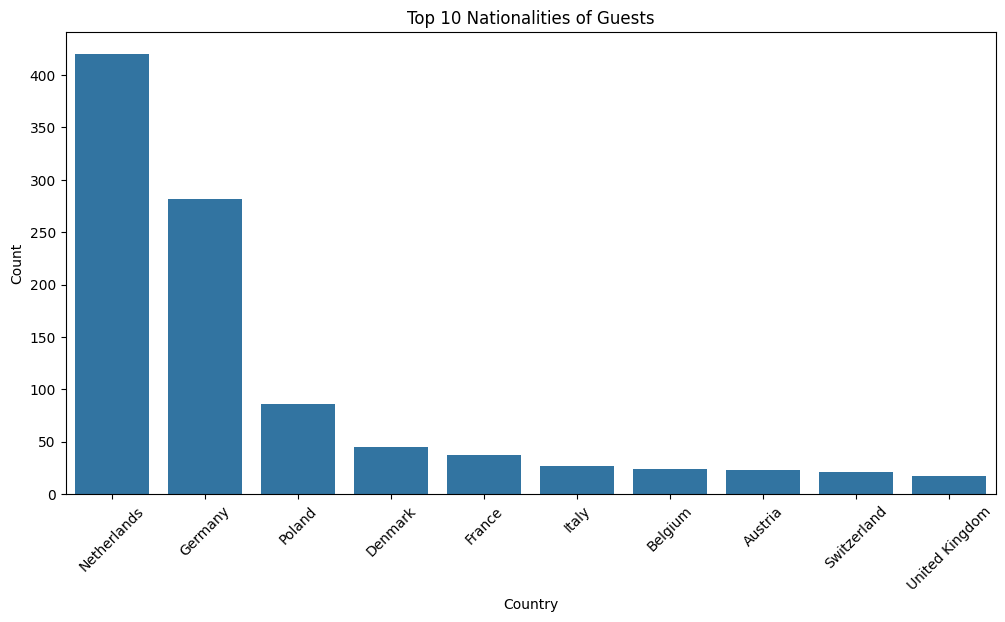

In [33]:
# Analysis of guest nationality
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='GuestCountryLabel', order=df['GuestCountryLabel'].value_counts().index[:10])
plt.title('Top 10 Nationalities of Guests')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

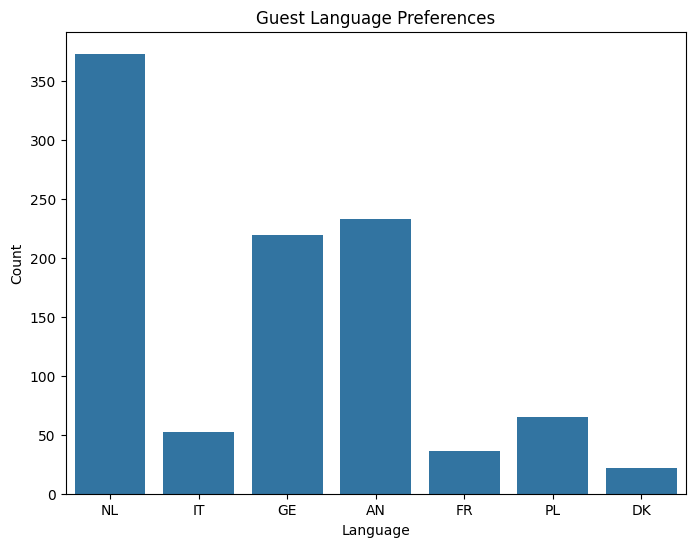

In [34]:
# Analysis of guest language preferences
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='GuestLanguage')
plt.title('Guest Language Preferences')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

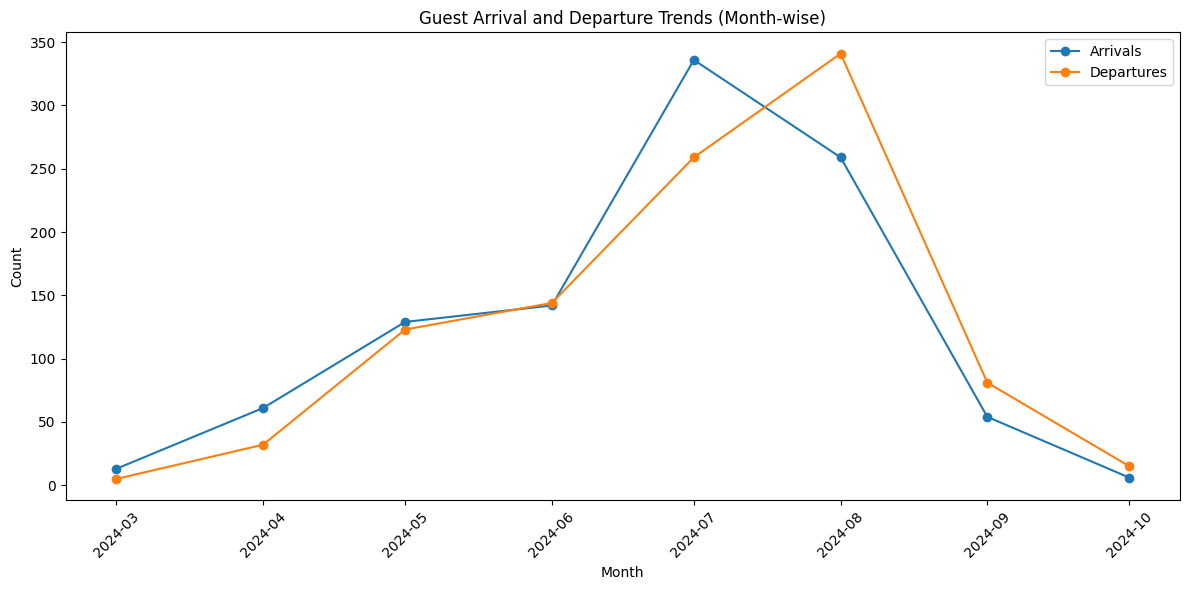

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert ArrivalDate and DepartureDate to datetime if they are not already
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'])
df['DepartureDate'] = pd.to_datetime(df['DepartureDate'])

# Group by month and count arrivals and departures
arrival_counts = df['ArrivalDate'].dt.to_period('M').value_counts().sort_index()
departure_counts = df['DepartureDate'].dt.to_period('M').value_counts().sort_index()

# Create a figure and axis object
plt.figure(figsize=(12, 6))

# Plot arrivals and departures
plt.plot(arrival_counts.index.to_timestamp(), arrival_counts.values, marker='o', label='Arrivals')
plt.plot(departure_counts.index.to_timestamp(), departure_counts.values, marker='o', label='Departures')

# Set title and labels
plt.title('Guest Arrival and Departure Trends (Month-wise)')
plt.xlabel('Month')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [6]:
# Identification of frequent or loyal guests
guest_frequencies = df['GuestId'].value_counts()
frequent_guests = guest_frequencies[guest_frequencies > 1]
print("Frequent Guests:")
print(frequent_guests)

Frequent Guests:
GuestId
IND146635    10
IND143962     7
IND94637      7
IND853        5
IND148633     5
IND19958      5
IND146303     4
IND148220     3
IND146875     3
IND146202     3
IND147582     3
IND145838     3
IND148097     3
IND142954     3
IND145839     3
IND147292     3
IND147709     3
IND145865     3
IND146896     3
IND142376     3
IND145926     3
IND147613     3
IND148122     3
IND53047      3
IND146328     2
IND146052     2
IND147903     2
IND126883     2
IND145986     2
IND145989     2
IND147380     2
IND58979      2
IND145660     2
IND146354     2
IND146611     2
IND146699     2
IND146594     2
IND146287     2
IND96410      2
IND145890     2
IND147723     2
IND147287     2
IND136577     2
IND147484     2
IND147819     2
IND148374     2
IND147014     2
IND147011     2
IND38805      2
IND146379     2
IND147608     2
IND146329     2
IND147051     2
IND141192     2
IND147306     2
IND4337       2
IND147126     2
IND148323     2
IND147063     2
IND147330     2
IND147048     2

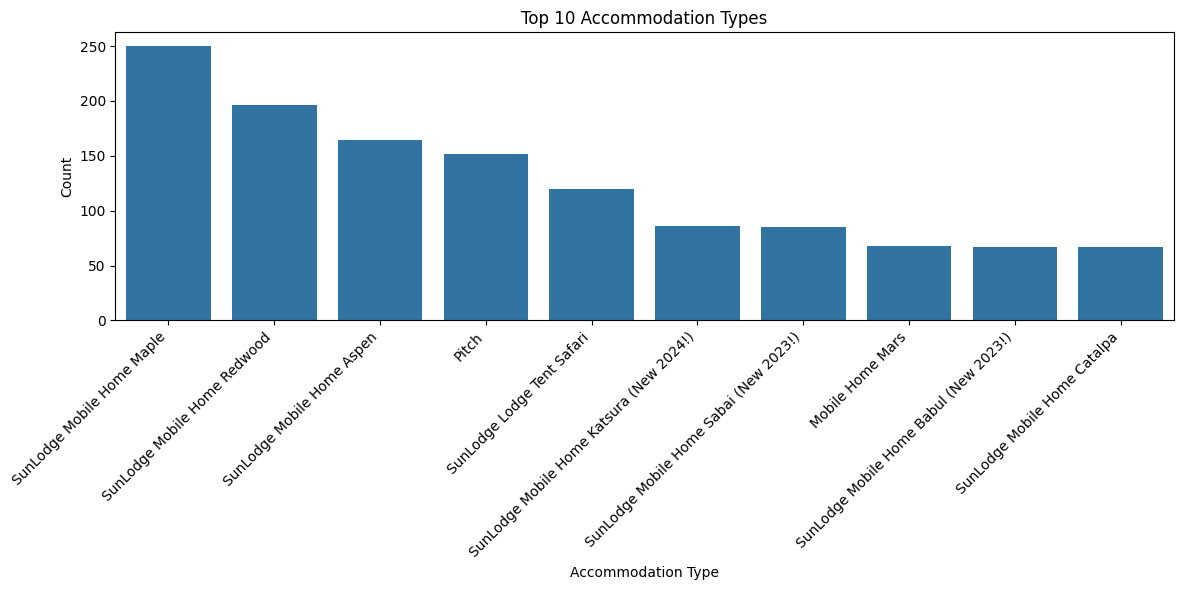

In [8]:
# Handle null values
df['AccommodationLabel'] = df['AccommodationLabel'].fillna('Unknown')

plt.figure(figsize=(12, 6))  # Adjust figure size
sns.countplot(data=df, x='AccommodationLabel', order=df['AccommodationLabel'].value_counts().index[:10])
plt.title('Top 10 Accommodation Types')
plt.xlabel('Accommodation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

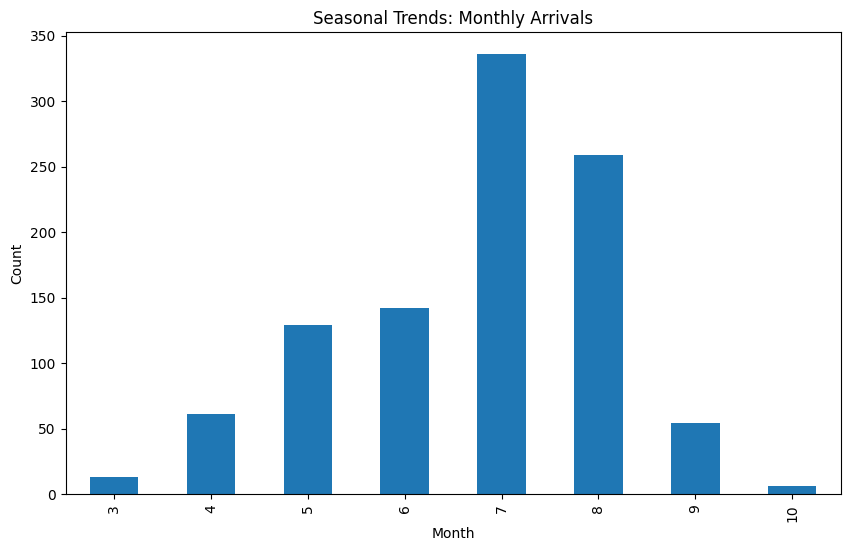

In [42]:
# Seasonal patterns in booking behavior
plt.figure(figsize=(10, 6))
df['ArrivalDate'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Seasonal Trends: Monthly Arrivals')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

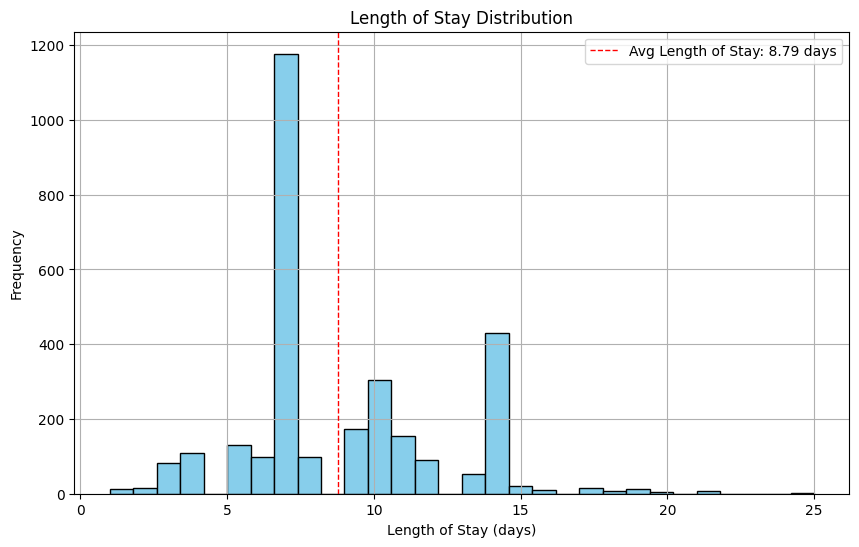

In [105]:
# Convert ArrivalDate and DepartureDate to datetime if they are not already
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'])
df['DepartureDate'] = pd.to_datetime(df['DepartureDate'])

# Calculate the length of stay for each guest
df['LengthOfStay'] = (df['DepartureDate'] - df['ArrivalDate']).dt.days

# Calculate the average length of stay
average_length_of_stay = df['LengthOfStay'].mean()

# Plot a histogram of length of stay
plt.figure(figsize=(10, 6))
plt.hist(df['LengthOfStay'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(average_length_of_stay, color='red', linestyle='dashed', linewidth=1, label=f'Avg Length of Stay: {average_length_of_stay:.2f} days')
plt.title('Length of Stay Distribution')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

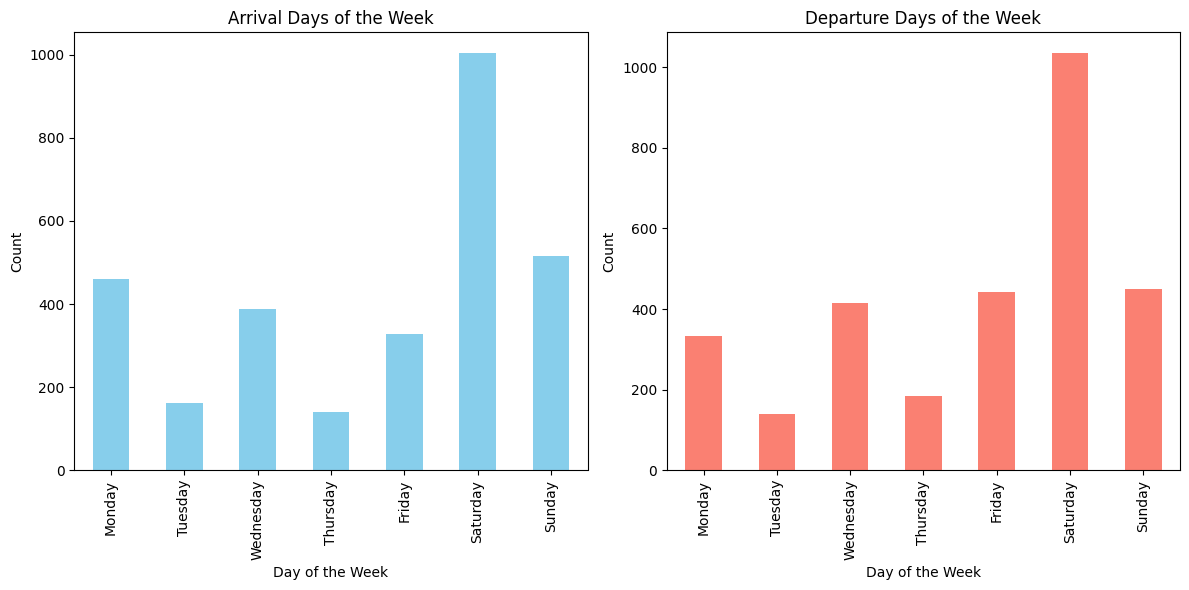

In [106]:
# Convert ArrivalDate and DepartureDate to datetime if they are not already
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'])
df['DepartureDate'] = pd.to_datetime(df['DepartureDate'])

# Extract day of the week for arrivals and departures
df['ArrivalDayOfWeek'] = df['ArrivalDate'].dt.dayofweek
df['DepartureDayOfWeek'] = df['DepartureDate'].dt.dayofweek

# Map numerical day of the week to weekday names
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['ArrivalDayOfWeek'] = df['ArrivalDayOfWeek'].map(lambda x: weekday_names[x])
df['DepartureDayOfWeek'] = df['DepartureDayOfWeek'].map(lambda x: weekday_names[x])

# Count occurrences of each day for arrivals and departures
arrival_counts = df['ArrivalDayOfWeek'].value_counts().reindex(weekday_names, fill_value=0)
departure_counts = df['DepartureDayOfWeek'].value_counts().reindex(weekday_names, fill_value=0)

# Plot bar charts for arrivals and departures
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
arrival_counts.plot(kind='bar', color='skyblue')
plt.title('Arrival Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
departure_counts.plot(kind='bar', color='salmon')
plt.title('Departure Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

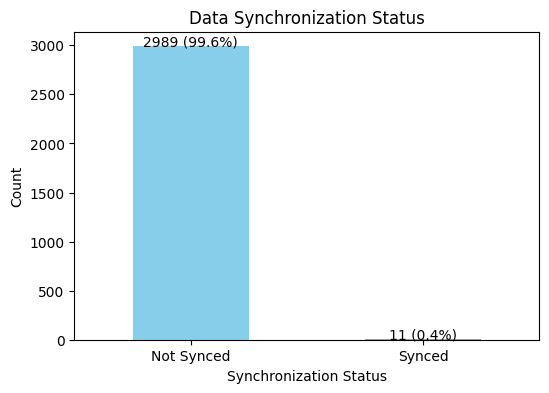

In [109]:
# Data Synchronization
# Assessment of data synchronization status
# Calculate value counts of 'IsSynced'
synced_counts = df['IsSynced'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
ax = synced_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Add counts and percentages to the bars
for i, count in enumerate(synced_counts):
    ax.text(i, count + 0.5, f'{count} ({count / df.shape[0] * 100:.1f}%)', ha='center')

plt.title('Data Synchronization Status')
plt.xlabel('Synchronization Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Synced', 'Synced'], rotation=0)
plt.show()